# Integracija i analiza podataka o laptopima

## 1. Uvod
Motivacija za projekt je nastala iz nedavne rasprave sa prijateljima o kvaliteti baterije na osobnim računalima i interesa za uvidom u zdravlje baterije mog osobnog računala.Cilj ove analize podataka će biti provedba postupka prikupljanja i učitavanja podataka te pretprocesiranja i integracije u jedan podatkovni skup.Nadalje,podaci će se spremiti u bazu podataka te će se omogućiti pristup putem REST API-a.Na kraju će se provesti analiza podataka te će se osvrnuti na rezultate analize.

## 2. Skupovi podataka
Oba skupa podataka su dobivena putem javno-dostupne web-stranice Kaggle.Ipak,jedan skup sadrži podatke o korištenju laptopa te zdravlje baterije,dok drugi skup sadrži podatke o proizvođačima.Tako je integracijom oba skupa podataka dobiven jedan cjelovit skup podataka koji nam daje opširniju sliku.

## 3. Prikupljanje i učitavanje podataka

In [1]:
import pandas as pd

df_laptops = pd.read_csv("data/laptop_data_cleansed.csv")
df_battery = pd.read_excel("data/laptop_battery_health_usage.xlsx")

In [2]:
df_laptops.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
df_battery.head()

,device_id,brand,model_year,os,usage_type,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,overheating_issues,performance_rating
0,LB001,HP,2021,Windows,Office,6,420,90,86,36,No,4
1,LB002,Dell,2020,Windows,Programming,8,610,100,78,48,Yes,3
2,LB003,Apple,2022,macOS,Creative,7,310,85,92,24,No,5
3,LB004,Lenovo,2019,Windows,Student,5,700,100,70,60,Yes,3
4,LB005,Asus,2021,Windows,Gaming,9,820,100,65,40,Yes,2


In [4]:
df_laptops.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [5]:
df_battery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   device_id                 50 non-null     object
 1   brand                     50 non-null     object
 2   model_year                50 non-null     int64 
 3   os                        50 non-null     object
 4   usage_type                50 non-null     object
 5   daily_usage_hours         50 non-null     int64 
 6   charging_cycles           50 non-null     int64 
 7   avg_charge_limit_percent  50 non-null     int64 
 8   battery_health_percent    50 non-null     int64 
 9   battery_age_months        50 non-null     int64 
 10  overheating_issues        50 non-null     object
 11  performance_rating        50 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ KB


## 4. Pretprocesiranje i integracija

In [6]:
df_laptops["Company"] = df_laptops["Company"].str.strip().str.lower()
df_battery["brand"] = df_battery["brand"].str.strip().str.lower()

In [7]:
df_laptops = df_laptops.dropna(subset=["Company", "Price"])
df_battery = df_battery.dropna(subset=["brand", "battery_health_percent"])

## 5. Pohrana podataka

In [8]:
# Laptop dataset
df_laptops["Company"] = (
    df_laptops["Company"]
    .str.strip()
    .str.lower()
)

# Battery dataset
df_battery["brand"] = (
    df_battery["brand"]
    .str.strip()
    .str.lower()
)

In [9]:
print(sorted(df_laptops["Company"].unique()))
print(sorted(df_battery["brand"].unique()))

['acer', 'apple', 'asus', 'chuwi', 'dell', 'fujitsu', 'google', 'hp', 'huawei', 'lenovo', 'lg', 'mediacom', 'microsoft', 'msi', 'razer', 'samsung', 'toshiba', 'vero', 'xiaomi']
['acer', 'apple', 'asus', 'dell', 'hp', 'lenovo']


In [10]:
df_laptops_clean = df_laptops[
    ["Company", "TypeName", "Ram", "Weight", "Price", "Cpu_brand", "Gpu_brand", "Os"]
]

df_battery_clean = df_battery[
    ["brand", "usage_type", "daily_usage_hours",
     "charging_cycles", "battery_health_percent"]
]

In [13]:
battery_agg = (
    df_battery_clean
    .groupby("brand")
    .agg(
        avg_battery_health=("battery_health_percent", "mean"),
        avg_daily_usage=("daily_usage_hours", "mean"),
        avg_charging_cycles=("charging_cycles", "mean")
    )
    .reset_index()
)

In [14]:
df_integrated = pd.merge(
    df_laptops_clean,
    battery_agg,
    left_on="Company",
    right_on="brand",
    how="inner"
)

In [ ]:
df_integrated = df_integrated.drop(columns=["brand"])

In [ ]:
df_integrated.head()
df_integrated.shape

(1121, 11)

In [ ]:
df_integrated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1121 non-null   object 
 1   TypeName             1121 non-null   object 
 2   Ram                  1121 non-null   int64  
 3   Weight               1121 non-null   float64
 4   Price                1121 non-null   float64
 5   Cpu_brand            1121 non-null   object 
 6   Gpu_brand            1121 non-null   object 
 7   Os                   1121 non-null   object 
 8   avg_battery_health   1121 non-null   float64
 9   avg_daily_usage      1121 non-null   float64
 10  avg_charging_cycles  1121 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 96.5+ KB


In [ ]:
df_integrated.isna().sum()

Company                0
TypeName               0
Ram                    0
Weight                 0
Price                  0
Cpu_brand              0
Gpu_brand              0
Os                     0
avg_battery_health     0
avg_daily_usage        0
avg_charging_cycles    0
dtype: int64

In [ ]:
df_integrated.to_csv(
    "data/laptop_integrated.csv",
    index=False
)

## 6. Pohrana integriranog skupa podataka

SQLite je korišten u ovom projektu zbog svoje jednostavnosti i lake integracije s Pythonom.Uostalom,ne zahtijeva postavljanje zasebnog poslužitelja baze podataka. Također, pruža sve potrebne funkcionalnosti za pohranu i pristup integriranom skupu podataka, uz visoku prenosivost jer se baza nalazi u jednoj datoteci.Baza podataka se nalazi u data/laptop_data.db

In [ ]:
import sqlite3

# povezivanje (baza se kreira ako ne postoji)
conn = sqlite3.connect("data/laptop_data.db")

# spremanje DataFrame-a u tablicu
df_integrated.to_sql(
    "laptop_battery_analysis",
    conn,
    if_exists="replace",
    index=False
)

conn.close()

In [ ]:
conn = sqlite3.connect("data/laptop_data.db")

query = "SELECT * FROM laptop_battery_analysis LIMIT 5"
df_check = pd.read_sql(query, conn)

conn.close()

df_check

,Company,TypeName,Ram,Weight,Price,Cpu_brand,Gpu_brand,Os,avg_battery_health,avg_daily_usage,avg_charging_cycles,cycle_group
0,apple,Ultrabook,8,1.37,11.175755,Intel Core i5,Intel,Mac,89.555556,7.111111,408.888889,300–600
1,apple,Ultrabook,8,1.34,10.776777,Intel Core i5,Intel,Mac,89.555556,7.111111,408.888889,300–600
2,hp,Notebook,8,1.86,10.329931,Intel Core i5,Intel,Others,80.777778,5.333333,504.444444,300–600
3,apple,Ultrabook,16,1.83,11.814476,Intel Core i7,AMD,Mac,89.555556,7.111111,408.888889,300–600
4,apple,Ultrabook,8,1.37,11.473101,Intel Core i5,Intel,Mac,89.555556,7.111111,408.888889,300–600


Za upotrebu REST API servisa korišten je Python to jest Flask te su se pomoću ruta u Flasku pozivali GET zahtjevi.Rješenje se nalazi u app.py datoteci

## 7. Analiza podataka

In [ ]:
bins = [0, 300, 500, 700, 1000]
labels = ["0–300", "301–500", "501–700", "700+"]

df_battery["cycle_range"] = pd.cut(
    df_battery["charging_cycles"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

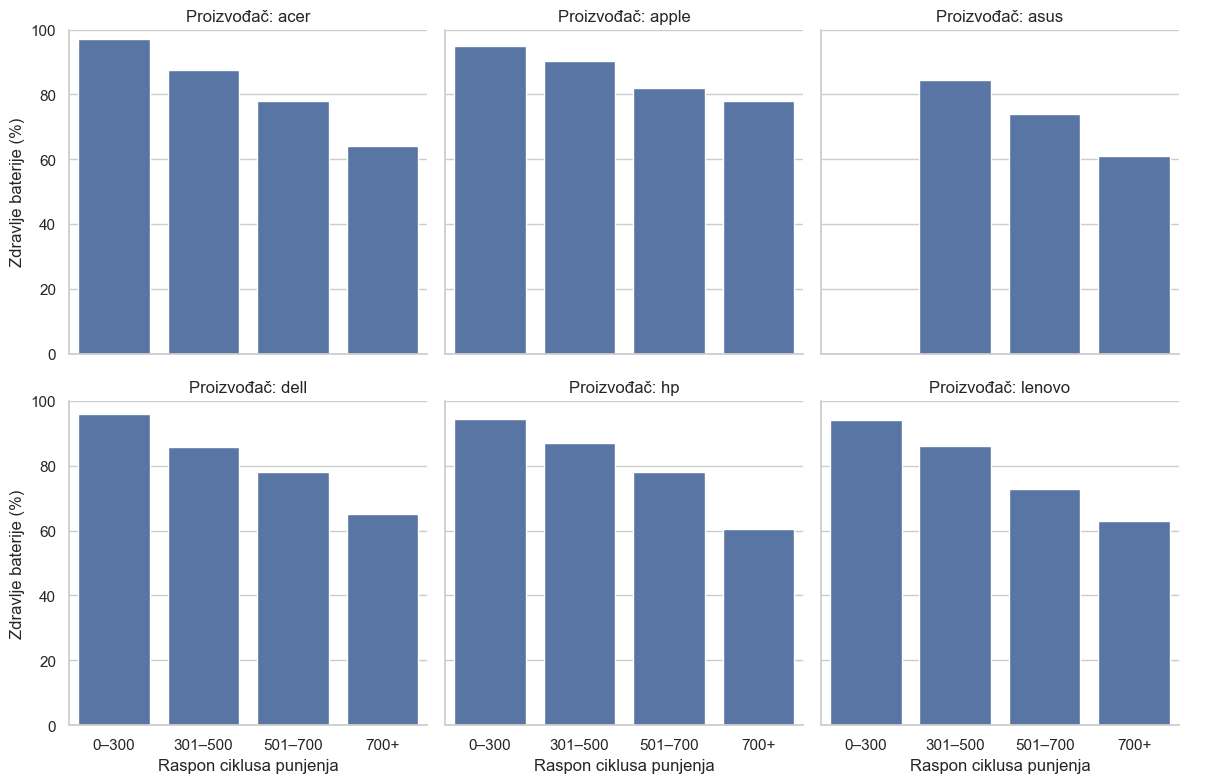

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=cycle_analysis_by_brand,
    x="cycle_range",
    y="avg_battery_health",
    col="brand",
    kind="bar",
    col_wrap=3,
    height=4,
    aspect=1
)

g.set_titles("Proizvođač: {col_name}")
g.set_axis_labels("Raspon ciklusa punjenja", "Zdravlje baterije (%)")
g.set(ylim=(0, 100))
plt.show()

In [ ]:
price_by_brand = (
    df_laptops
    .groupby("Company")
    .agg(avg_price=("Price", "mean"))
    .reset_index()
)

price_by_brand["Company"] = price_by_brand["Company"].str.lower()

In [ ]:
battery_health_by_brand = (
    df_battery
    .groupby("brand")
    .agg(avg_battery_health=("battery_health_percent", "mean"))
    .reset_index()
)

In [ ]:
price_health_comparison = pd.merge(
    price_by_brand,
    battery_health_by_brand,
    left_on="Company",
    right_on="brand",
    how="inner"
).drop(columns=["brand"])

price_health_comparison

,Company,avg_price,avg_battery_health
0,acer,10.301821,79.250000
1,apple,11.274645,89.555556
2,asus,10.797073,70.125000
3,dell,10.924479,80.875000
4,hp,10.805129,80.777778
5,lenovo,10.779085,79.125000


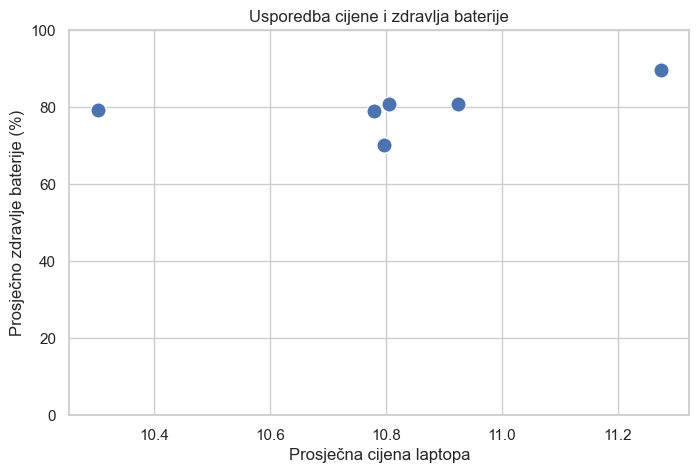

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=price_health_comparison,
    x="avg_price",
    y="avg_battery_health",
    s=120
)

plt.title("Usporedba cijene i zdravlja baterije")
plt.xlabel("Prosječna cijena laptopa")
plt.ylabel("Prosječno zdravlje baterije (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [ ]:
df_integrated[["Gpu_brand", "avg_battery_health"]].head()

,Gpu_brand,avg_battery_health
0,Intel,89.555556
1,Intel,89.555556
2,Intel,80.777778
3,AMD,89.555556
4,Intel,89.555556


In [ ]:
gpu_battery_analysis = (
    df_integrated
    .groupby("Gpu_brand")
    .agg(
        avg_battery_health=("avg_battery_health", "mean"),
        min_battery_health=("avg_battery_health", "min"),
        max_battery_health=("avg_battery_health", "max"),
        count_devices=("Gpu_brand", "count")
    )
    .reset_index()
)

gpu_battery_analysis

,Gpu_brand,avg_battery_health,min_battery_health,max_battery_health,count_devices
0,AMD,79.910324,70.125,89.555556,173
1,Intel,79.423043,70.125,89.555556,623
2,Nvidia,77.596752,70.125,80.875000,325


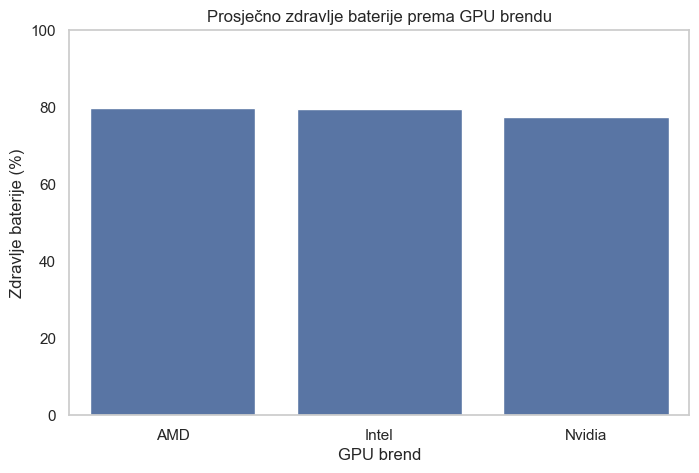

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=gpu_battery_analysis,
    x="Gpu_brand",
    y="avg_battery_health"
)

plt.title("Prosječno zdravlje baterije prema GPU brendu")
plt.xlabel("GPU brend")
plt.ylabel("Zdravlje baterije (%)")
plt.ylim(0, 100)
plt.grid(axis="y")
plt.show()

## 7. Kritički osvrt i zaključak

Temeljem analize podataka dobili smo uvid kako svim osobnim računalima s vremenom pada zdravlje baterije no Macbook računala su najizdržljivija u odnosu na broj punjenja.Nakon toga se provela analize cijene i zdravlja baterija što nam daje do znanja kako generalno cijena nije korelativno u odnosu na prosječno zdravlje baterije.Na kraju nam je usporedba grafičkih kartica tj. GPU brendova dala do znanja da niti različite grafičke kartice ne utječu na zdravlje baterije.

## 8. Literatura (IEEE)

[1]
Matplotlib Development Team, Matplotlib: Visualization with Python, 2025. [Online]. Dostupno: https://matplotlib.org/stable/index.html. [Pristupljeno: 21. sij. 2026].
[2]
Pallets Projects, Flask Documentation, 2025. [Online]. Dostupno: https://flask.palletsprojects.com/en/stable/. [Pristupljeno: 21. sij. 2026].
[3]
W. McKinney, Python for Data Analysis: Data Wrangling with pandas, NumPy, and Jupyter, 3rd ed. Sebastopol, CA, USA: O’Reilly Media, 2022.
[4]
SQLite Consortium, SQLite Documentation, 2025. [Online]. Dostupno: https://www.sqlite.org/docs.html. [Pristupljeno: 21. sij. 2026].

    

## 9.Podatkovni skupovi korišteni u zadatku

https://www.kaggle.com/datasets/gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset

https://www.kaggle.com/datasets/prince7489/laptop-battery-health-and-usage-dataset